In [ ]:
pip install tensorflow

LSTM ALGORITHM FOR TRAFFIC PREDICTION


456/456 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step


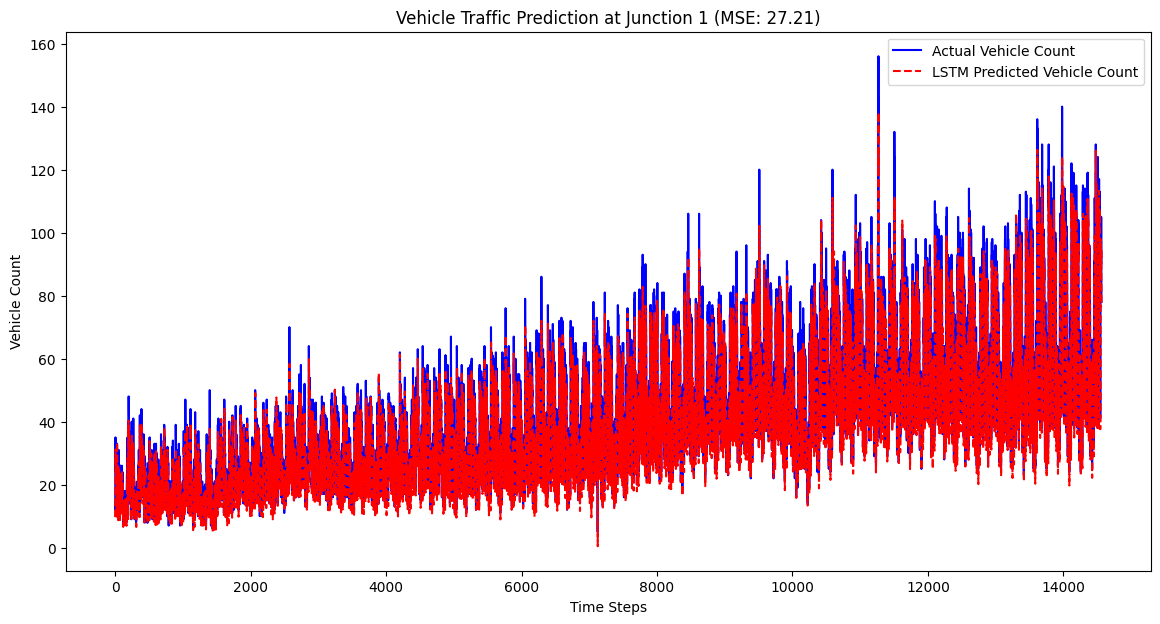

(76.48776, 27.213135110860673)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load data
file_path = '/content/traffic.csv'
data = pd.read_csv(file_path)

# Function to preprocess data for a specified junction
def preprocess_for_lstm(data, junction, seq_length=30):
    # Filter data for the specific junction
    junction_data = data[data['Junction'] == junction]['Vehicles'].values.reshape(-1, 1)

    # Scale data between 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(junction_data)

    # Create sequences of `seq_length` time steps for each input sample
    X, y = [], []
    for i in range(seq_length, len(scaled_data)):
        X.append(scaled_data[i-seq_length:i, 0])
        y.append(scaled_data[i, 0])

    # Convert lists to arrays and reshape X for LSTM input
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

# Function to train LSTM model and make predictions
def lstm_prediction_and_plot(data, junction):
    # Preprocess data
    X, y, scaler = preprocess_for_lstm(data, junction)

    # Build LSTM model with Input layer
    model = Sequential()
    model.add(Input(shape=(X.shape[1], 1)))  # Define input shape explicitly
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

    # Train the model
    model.fit(X, y, epochs=10, batch_size=32, verbose=0)

    # Predict on the input data
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)  # Inverse transform to original scale
    actual_values = scaler.inverse_transform(y.reshape(-1, 1))  # Inverse scale actual values

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(actual_values, predictions)

    # Plot the results
    plt.figure(figsize=(14, 7))
    plt.plot(actual_values, color="blue", label="Actual Vehicle Count")
    plt.plot(predictions, color="red", linestyle="--", label="LSTM Predicted Vehicle Count")
    plt.title(f"Vehicle Traffic Prediction at Junction {junction} (MSE: {mse:.2f})")
    plt.xlabel("Time Steps")
    plt.ylabel("Vehicle Count")
    plt.legend()
    plt.show()

    return predictions[-1][0], mse  # Last prediction and MSE as performance measure

# Specify junction and make prediction with plot
junction = 1
lstm_prediction_and_plot(data, junction)


SVR ALGORITHM FOR TRAFFIC PREDICTION

SVR Mean Squared Error: 236.96


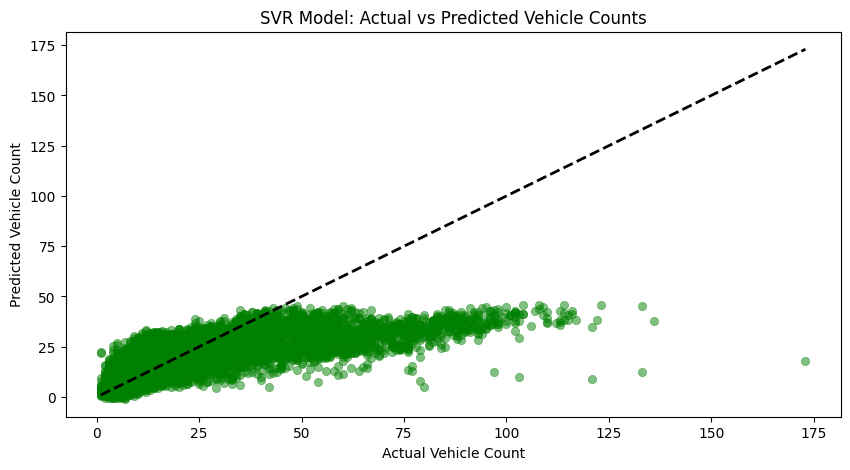

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = '/content/traffic.csv'  # replace with your file path
data = pd.read_csv(file_path)

# Convert 'DateTime' to datetime and extract features
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data['DateTime'].dt.day
data['Month'] = data['DateTime'].dt.month
data['Weekday'] = data['DateTime'].dt.weekday

# Features and target variable
X = data[['Junction', 'Hour', 'Day', 'Month', 'Weekday']]
y = data['Vehicles']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

# Predict on test set
y_pred = svr_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"SVR Mean Squared Error: {mse:.2f}")

# Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="green", edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Vehicle Count")
plt.ylabel("Predicted Vehicle Count")
plt.title("SVR Model: Actual vs Predicted Vehicle Counts")
plt.show()



RANDOM FOREST ALGORITHM FOR TRAFFIC PREDICTION


Random Forest Mean Squared Error: 53.63


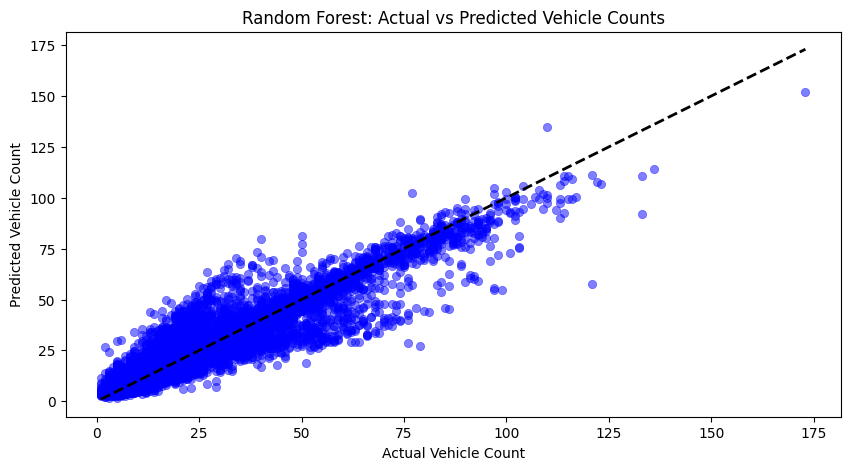

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
file_path = '/content/traffic.csv'  # replace with your file path
data = pd.read_csv(file_path)

# Convert 'DateTime' to datetime and extract features
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Hour'] = data['DateTime'].dt.hour
data['Day'] = data['DateTime'].dt.day
data['Month'] = data['DateTime'].dt.month
data['Weekday'] = data['DateTime'].dt.weekday

# Features and target variable
X = data[['Junction', 'Hour', 'Day', 'Month', 'Weekday']]
y = data['Vehicles']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Random Forest Mean Squared Error: {mse:.2f}")

# Plotting Actual vs Predicted Values
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue", edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Vehicle Count")
plt.ylabel("Predicted Vehicle Count")
plt.title("Random Forest: Actual vs Predicted Vehicle Counts")
plt.show()


In [1]:
pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 599.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.8/319.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [2]:
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from datetime import datetime

# Load the traffic data CSV
data_path = "/content/traffic.csv"
traffic_df = pd.read_csv(data_path)

# Convert DateTime to numeric features (year, month, day, hour, etc.) if needed
traffic_df['Year'] = pd.to_datetime(traffic_df['DateTime']).dt.year
traffic_df['Month'] = pd.to_datetime(traffic_df['DateTime']).dt.month
traffic_df['Day'] = pd.to_datetime(traffic_df['DateTime']).dt.day
traffic_df['Hour'] = pd.to_datetime(traffic_df['DateTime']).dt.hour

# Select features and target variable
features = traffic_df.drop(columns=['Vehicles', 'DateTime', 'ID'])  # Use relevant features only
target = traffic_df['Vehicles']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the RandomForest model
model = RandomForestRegressor(n_estimators=100, random_state=0)  # Increased estimators
model.fit(X_train_scaled, y_train)

# Define function to predict traffic volume for selected junction and date
def predict_traffic(junction, date, hour):
    try:
        # Check if the date matches the expected format
        date_obj = datetime.strptime(date, "%d-%m-%Y")  # Expecting DD-MM-YYYY format
        date_features = {
            'Year': date_obj.year,
            'Month': date_obj.month,
            'Day': date_obj.day,
            'Hour': hour,  # Use the provided hour
            'Junction': junction  # Include the Junction feature
        }

        # Create input data for the model
        junction_data = pd.DataFrame([date_features])

        # Ensure the columns are in the same order as training
        junction_data = junction_data[features.columns]  # Match the feature order

        # Scale the input data
        junction_data_scaled = scaler.transform(junction_data)

        # Predict traffic volume
        traffic_prediction = model.predict(junction_data_scaled)[0]

        # Create a bar chart for visual output
        plt.figure(figsize=(6, 4))
        plt.bar(['Predicted Traffic Volume'], [traffic_prediction], color='blue')
        plt.ylabel('Number of Vehicles')
        plt.title(f'Traffic Prediction for {junction} on {date} at hour {hour}')
        plt.ylim(0, max(traffic_prediction + 50, 100))  # Adjust y-limit based on prediction
        plt.grid(axis='y', linestyle='--')

        # Save the plot to a file
        plt_path = "/content/prediction_plot.png"
        plt.savefig(plt_path)
        plt.close()  # Close the plot to avoid displaying it in the notebook

        # Return both the prediction text and the plot path
        return f"Predicted Traffic Volume for {junction} on {date} at hour {hour}: {traffic_prediction:.2f}", plt_path

    except ValueError as e:
        # If there's a ValueError, return the error message
        return str(e), None
    except Exception as e:
        # Catch any other exceptions and provide a general error message
        return f"An error occurred: {str(e)}. Please ensure all inputs are correct.", None

# Gradio interface
junctions_list = traffic_df['Junction'].unique().tolist()

iface = gr.Interface(
    fn=predict_traffic,
    inputs=[
        gr.Dropdown(choices=junctions_list, label="Select Junction"),
        gr.Textbox(label="Enter Date (DD-MM-YYYY)"),  # Updated label
        gr.Slider(minimum=0, maximum=23, label="Select Hour", step=1)  # Added hour selection
    ],
    outputs=[
        gr.Textbox(label="Prediction Result"),  # For textual output
        gr.Image(label="Prediction Visualization")  # For image output
    ]
)

iface.launch(share=True)

FileNotFoundError: [Errno 2] No such file or directory: '/content/traffic.csv'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess the data
def load_data(filepath):
    data = pd.read_csv(filepath)
    data['DateTime'] = pd.to_datetime(data['DateTime'], format='%Y-%m-%d %H:%M:%S')
    return data

# Train and predict with Linear Regression
def linear_regression_prediction(data, junction):
    data_junction = data[data['Junction'] == junction][['DateTime', 'Vehicles']].reset_index(drop=True)
    data_junction['Lag_1'] = data_junction['Vehicles'].shift(1)
    data_junction.dropna(inplace=True)

    X = data_junction[['Lag_1']]
    y = data_junction['Vehicles']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    predictions = model.predict(X_test)

    # Calculate accuracy metrics
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    # Return mean prediction and accuracy metrics, along with the trained model for future predictions
    return predictions.mean(), mse, mae, r2, model

# Function to predict future vehicle count
def predict_future_vehicle_count(model, last_vehicles_count, junction):
    # Use the last known vehicle count as input for prediction
    future_prediction = model.predict([[last_vehicles_count]])
    return future_prediction[0]

# Visualization
def visualize_predictions(filepath):
    data = load_data(filepath)

    junction_predictions = {}
    junction_metrics = {}

    # Get mean predictions and metrics for each junction
    for junction in range(1, 5):
        mean_prediction, mse, mae, r2, model = linear_regression_prediction(data, junction)
        junction_predictions[f'Junction {junction}'] = mean_prediction
        junction_metrics[f'Junction {junction}'] = {
            'MSE': mse,
            'MAE': mae,
            'R²': r2
        }

        # Predict a future vehicle count (using the mean prediction as the last count)
        future_vehicle_count = predict_future_vehicle_count(model, mean_prediction, junction)
        print(f"Future Vehicle Count Prediction for Junction {junction}: {future_vehicle_count:.2f}")

    # Create a bar plot for the mean predictions
    plt.figure(figsize=(12, 8))
    bars = plt.bar(junction_predictions.keys(), junction_predictions.values(), color='skyblue')
    plt.title('Mean Vehicle Predictions for Each Junction')
    plt.xlabel('Junction')
    plt.ylabel('Mean Predicted Vehicles')
    plt.ylim(0, max(junction_predictions.values()) * 1.1)  # Slightly increase y-axis limit for better visibility
    plt.grid(axis='y')

    # Add accuracy metrics on the plot
    for i, (junction, metrics) in enumerate(junction_metrics.items()):
        plt.text(i, junction_predictions[f'Junction {i + 1}'] + 1,
                 f'MSE: {metrics["MSE"]:.2f}\nMAE: {metrics["MAE"]:.2f}\nR²: {metrics["R²"]:.2f}',
                 ha='center', va='bottom', fontsize=10)

    plt.show()

# File path to your dataset
file_path = '/content/traffic.csv'
visualize_predictions(file_path)